# Task 1 Starts Here

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## Converting excel file into CSV file
tr_data=pd.read_csv ("tr_data.csv")

In [3]:
tr_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


# Exploratory Data Analysis on Transaction Dataset

In [4]:
tr_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [5]:
##columns names
tr_data.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [6]:
tr_data.info

<bound method DataFrame.info of          DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2      

In [7]:
## No Null Values
tr_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
##Checking types of columns
tr_data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [9]:
##Checking Date Column
tr_data['DATE'] 

0         43390
1         43599
2         43605
3         43329
4         43330
          ...  
264831    43533
264832    43325
264833    43410
264834    43461
264835    43365
Name: DATE, Length: 264836, dtype: int64

In [10]:
##Converting Date Column type from int to Datetime
tr_data['DATE'] = pd.to_datetime(tr_data['DATE'], unit='D', origin='1899-12-30')

In [11]:
tr_data[['DATE']]

,DATE
0,2018-10-17
1,2019-05-14
2,2019-05-20
3,2018-08-17
4,2018-08-18
...,...
264831,2019-03-09
264832,2018-08-13
264833,2018-11-06
264834,2018-12-27


In [12]:
##Checking Product Name Column of Transaction Data
tr_data[['PROD_NAME']]

,PROD_NAME
0,Natural Chip Compny SeaSalt175g
1,CCs Nacho Cheese 175g
2,Smiths Crinkle Cut Chips Chicken 170g
3,Smiths Chip Thinly S/Cream&Onion 175g
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g
...,...
264831,Kettle Sweet Chilli And Sour Cream 175g
264832,Tostitos Splash Of Lime 175g
264833,Doritos Mexicana 170g
264834,Doritos Corn Chip Mexican Jalapeno 150g


In [13]:
df=tr_data

In [14]:
## Removing digits and special characters from columns
df['prod']= tr_data['PROD_NAME'].fillna('').astype(str).str.replace(r'[^A-Za-z ]', '', regex=True).replace('', np.nan, regex=False)

In [15]:
df[['prod']]

,prod
0,Natural Chip Compny SeaSaltg
1,CCs Nacho Cheese g
2,Smiths Crinkle Cut Chips Chicken g
3,Smiths Chip Thinly SCreamOnion g
4,Kettle Tortilla ChpsHnyJlpno Chili g
...,...
264831,Kettle Sweet Chilli And Sour Cream g
264832,Tostitos Splash Of Lime g
264833,Doritos Mexicana g
264834,Doritos Corn Chip Mexican Jalapeno g


In [16]:
## Removing last character from string
df['prod'] = df['prod'].str[:-1]
df[['prod']]

,prod
0,Natural Chip Compny SeaSalt
1,CCs Nacho Cheese
2,Smiths Crinkle Cut Chips Chicken
3,Smiths Chip Thinly SCreamOnion
4,Kettle Tortilla ChpsHnyJlpno Chili
...,...
264831,Kettle Sweet Chilli And Sour Cream
264832,Tostitos Splash Of Lime
264833,Doritos Mexicana
264834,Doritos Corn Chip Mexican Jalapeno


In [17]:
df[['prod']].head(30)

,prod
0,Natural Chip Compny SeaSalt
1,CCs Nacho Cheese
2,Smiths Crinkle Cut Chips Chicken
3,Smiths Chip Thinly SCreamOnion
4,Kettle Tortilla ChpsHnyJlpno Chili
5,Old El Paso Salsa Dip Tomato Mild
6,Smiths Crinkle Chips Salt Vinegar
7,Grain Waves Sweet Chilli
8,Doritos Corn Chip Mexican Jalapeno
9,Grain Waves Sour CreamChives


In [18]:
df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [19]:
## Removing Outliers
df['TOT_SALES'] = df['TOT_SALES'][(np.abs(stats.zscore(df['TOT_SALES'])) < 3)]
df['PROD_QTY'] = df['PROD_QTY'][(np.abs(stats.zscore(df['PROD_QTY'])) < 3)]
df['PROD_NBR'] = df['PROD_NBR'][(np.abs(stats.zscore(df['PROD_NBR'])) < 3)]
df['TXN_ID'] = df['TXN_ID'][(np.abs(stats.zscore(df['TXN_ID'])) < 3)]
df['LYLTY_CARD_NBR'] = df['LYLTY_CARD_NBR'][(np.abs(stats.zscore(df['LYLTY_CARD_NBR'])) < 3)]
df['STORE_NBR'] = df['STORE_NBR'][(np.abs(stats.zscore(df['STORE_NBR'])) < 3)]

In [20]:
df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,264792.000000,264835.000000,264836.000000,263987.000000,264397.000000
mean,135.08011,135254.586577,135149.699103,56.583157,1.897389,7.276687
std,76.78418,76785.136472,78007.384759,32.826638,0.308772,2.463343
min,1.00000,1000.000000,1.000000,1.000000,1.000000,1.500000
25%,70.00000,70018.750000,67601.000000,28.000000,2.000000,5.400000
50%,130.00000,130353.000000,135137.000000,56.000000,2.000000,7.400000
75%,203.00000,203087.000000,202700.500000,85.000000,2.000000,8.800000
max,272.00000,272392.000000,270209.000000,114.000000,3.000000,16.500000


In [21]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,prod
0,2018-10-17,1,1000.0,1.0,5,Natural Chip Compny SeaSalt175g,2.0,6.0,Natural Chip Compny SeaSalt
1,2019-05-14,1,1307.0,348.0,66,CCs Nacho Cheese 175g,3.0,6.3,CCs Nacho Cheese
2,2019-05-20,1,1343.0,383.0,61,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,Smiths Crinkle Cut Chips Chicken
3,2018-08-17,2,2373.0,974.0,69,Smiths Chip Thinly S/Cream&Onion 175g,NaN,15.0,Smiths Chip Thinly SCreamOnion
4,2018-08-18,2,2426.0,1038.0,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8,Kettle Tortilla ChpsHnyJlpno Chili
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319.0,270088.0,89,Kettle Sweet Chilli And Sour Cream 175g,2.0,10.8,Kettle Sweet Chilli And Sour Cream
264832,2018-08-13,272,272358.0,270154.0,74,Tostitos Splash Of Lime 175g,1.0,4.4,Tostitos Splash Of Lime
264833,2018-11-06,272,272379.0,270187.0,51,Doritos Mexicana 170g,2.0,8.8,Doritos Mexicana
264834,2018-12-27,272,272379.0,270188.0,42,Doritos Corn Chip Mexican Jalapeno 150g,2.0,7.8,Doritos Corn Chip Mexican Jalapeno


In [22]:
df["prod"].describe()

count                                264836
unique                                  114
top       Kettle Mozzarella   Basil  Pesto 
freq                                   3304
Name: prod, dtype: object

In [23]:
#finding the most frequest words
import collections
freq=collections.Counter([j  for s in df["prod"] for j in s.split()])

In [24]:
freq

Counter({'Natural': 6050,
         'Chip': 18645,
         'Compny': 1468,
         'SeaSalt': 1468,
         'CCs': 4551,
         'Nacho': 4658,
         'Cheese': 27890,
         'Smiths': 28860,
         'Crinkle': 23960,
         'Cut': 20754,
         'Chips': 49770,
         'Chicken': 18577,
         'Thinly': 7507,
         'SCreamOnion': 1473,
         'Kettle': 41288,
         'Tortilla': 9580,
         'ChpsHnyJlpno': 3296,
         'Chili': 3296,
         'Old': 9324,
         'El': 9324,
         'Paso': 9324,
         'Salsa': 18094,
         'Dip': 9324,
         'Tomato': 7669,
         'Mild': 6048,
         'Salt': 24719,
         'Vinegar': 12402,
         'Grain': 6272,
         'Waves': 6272,
         'Sweet': 7883,
         'Chilli': 13895,
         'Doritos': 24962,
         'Corn': 22063,
         'Mexican': 3204,
         'Jalapeno': 3204,
         'Sour': 13882,
         'CreamChives': 3105,
         'Sensations': 9429,
         'Siracha': 3127,
         'Lim

In [25]:
#sorting in decreasing order of the frequency of words
fre=pd.DataFrame([freq.keys(),freq.values()],index=['Word','Frequency']).transpose().sort_values(by='Frequency',ascending=False)

In [26]:
fre.head()

,Word,Frequency
10,Chips,49770
14,Kettle,41288
7,Smiths,28860
6,Cheese,27890
66,Pringles,25102


In [27]:
#dropping salsa items
df.drop(df[[("Salsa" in s)  for s in df['prod']]].index,inplace=True)


In [28]:
df[[("Salsa" in s)  for s in df['prod']]]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,prod


In [29]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,prod
0,2018-10-17,1,1000.0,1.0,5,Natural Chip Compny SeaSalt175g,2.0,6.0,Natural Chip Compny SeaSalt
1,2019-05-14,1,1307.0,348.0,66,CCs Nacho Cheese 175g,3.0,6.3,CCs Nacho Cheese
2,2019-05-20,1,1343.0,383.0,61,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,Smiths Crinkle Cut Chips Chicken
3,2018-08-17,2,2373.0,974.0,69,Smiths Chip Thinly S/Cream&Onion 175g,NaN,15.0,Smiths Chip Thinly SCreamOnion
4,2018-08-18,2,2426.0,1038.0,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8,Kettle Tortilla ChpsHnyJlpno Chili


In [30]:
## Removing Previous Product Column
df.drop('PROD_NAME', inplace=True, axis=1)

In [31]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,prod
0,2018-10-17,1,1000.0,1.0,5,2.0,6.0,Natural Chip Compny SeaSalt
1,2019-05-14,1,1307.0,348.0,66,3.0,6.3,CCs Nacho Cheese
2,2019-05-20,1,1343.0,383.0,61,2.0,2.9,Smiths Crinkle Cut Chips Chicken
3,2018-08-17,2,2373.0,974.0,69,NaN,15.0,Smiths Chip Thinly SCreamOnion
4,2018-08-18,2,2426.0,1038.0,108,3.0,13.8,Kettle Tortilla ChpsHnyJlpno Chili


In [32]:
df.rename(columns = {'prod':'PROD_NAME'}, inplace = True)

In [33]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_NAME
0,2018-10-17,1,1000.0,1.0,5,2.0,6.0,Natural Chip Compny SeaSalt
1,2019-05-14,1,1307.0,348.0,66,3.0,6.3,CCs Nacho Cheese
2,2019-05-20,1,1343.0,383.0,61,2.0,2.9,Smiths Crinkle Cut Chips Chicken
3,2018-08-17,2,2373.0,974.0,69,NaN,15.0,Smiths Chip Thinly SCreamOnion
4,2018-08-18,2,2426.0,1038.0,108,3.0,13.8,Kettle Tortilla ChpsHnyJlpno Chili


In [34]:
tr_data=df

In [35]:
## Saving our Information 
tr_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,246700.000000,246741.000000,246742.000000,245954.000000,246331.000000
mean,135.051098,135226.547053,135121.855512,56.351789,1.898079,7.293598
std,76.787096,76788.229580,78012.877099,33.695428,0.307980,2.410614
min,1.000000,1000.000000,1.000000,1.000000,1.000000,1.700000
25%,70.000000,70014.000000,67569.000000,26.000000,2.000000,5.800000
50%,130.000000,130362.000000,135182.000000,53.000000,2.000000,7.400000
75%,203.000000,203076.000000,202653.000000,87.000000,2.000000,8.800000
max,272.000000,272392.000000,270209.000000,114.000000,3.000000,16.500000


In [36]:
ts=df.groupby('DATE').count()
ts.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_NAME
DATE,,,,,,,
2018-07-01,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660


In [37]:
#missing date 
set(pd.date_range('2018-07-01', end='2019-06-30',freq='D'))-set((ts.index))

{Timestamp('2018-12-25 00:00:00', freq='D')}

In [38]:
ts.loc['2018-12-25']=np.nan#=ts.mean().apply(int)

In [39]:
ts[ts.index=='2018-12-25']

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_NAME
DATE,,,,,,,
2018-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
dummy=pd.read_csv('tr_data.csv')

In [41]:
dummy.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [42]:
def fun(s):
    a=[]
    for i in s:
        if i in ['0','1','2','3','4','5','6','7','8','9']:
            a.append(i)
    return int("".join(a))


In [43]:
dummy['PACKAGE_SIZE']=dummy['PROD_NAME'].apply(fun)
dummy.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKAGE_SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [44]:
dummy['BRAND']=[s.split()[0] for s in dummy['PROD_NAME']]
dummy['BRAND'].replace('Dorito','Doritos',inplace=True)
dummy['BRAND'].replace('Infzns','Infuzions',inplace=True)
dummy['BRAND'].replace('Smith','Smiths',inplace=True)
dummy['BRAND'].replace('Snbts','Sunbites',inplace=True)
dummy['BRAND'].replace('Red','RRD',inplace=True)
dummy['BRAND'].replace('Old','Old El Paso',inplace=True)
dummy['BRAND'].replace('WW','Woolworths',inplace=True)
dummy['BRAND'].replace('Natural','NCC',inplace=True)

In [45]:
dummy

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKAGE_SIZE,BRAND
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NCC
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos


<Axes: xlabel='PACKAGE_SIZE', ylabel='BRAND'>

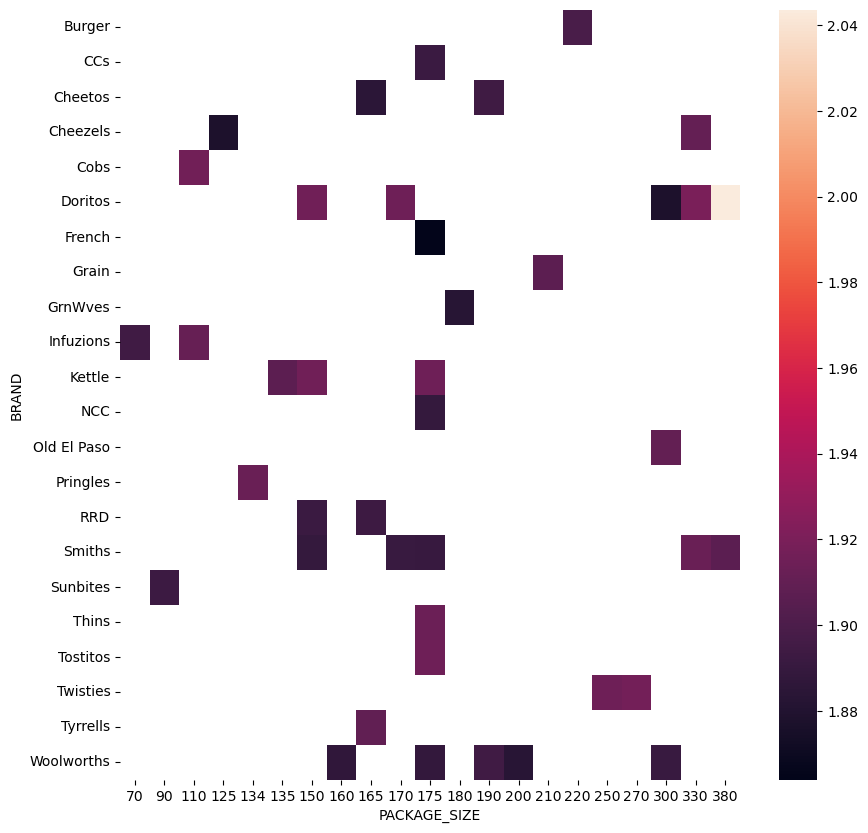

In [46]:
#heatmap showing packet quantity mostly bought according to brand and packet size
plt.figure(figsize=(10,10))
sns.heatmap(pd.pivot_table(data= dummy,index='BRAND',columns='PACKAGE_SIZE',values='PROD_QTY'))

<Axes: ylabel='count'>

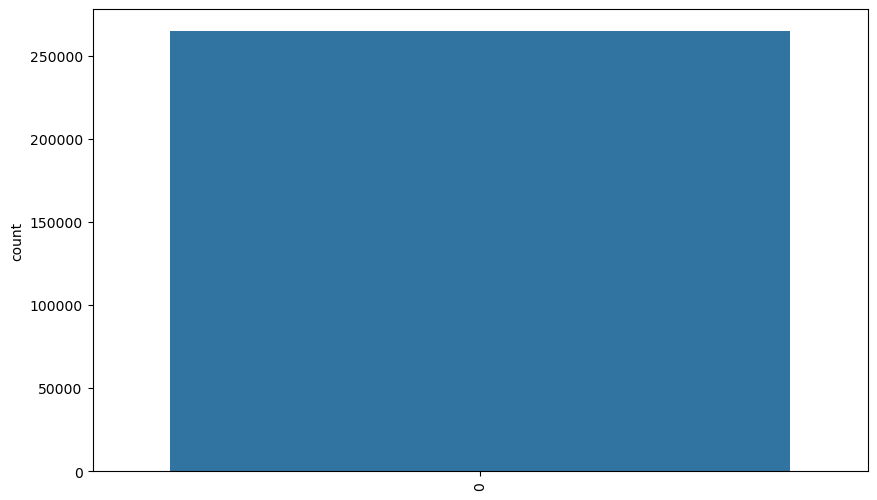

In [47]:
#histogram of packet size
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(dummy['PACKAGE_SIZE'])

C:\Users\Mubashir\AppData\Local\Temp\ipykernel_12176\1028377770.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dummy.corr(),cmap='viridis')


<Axes: >

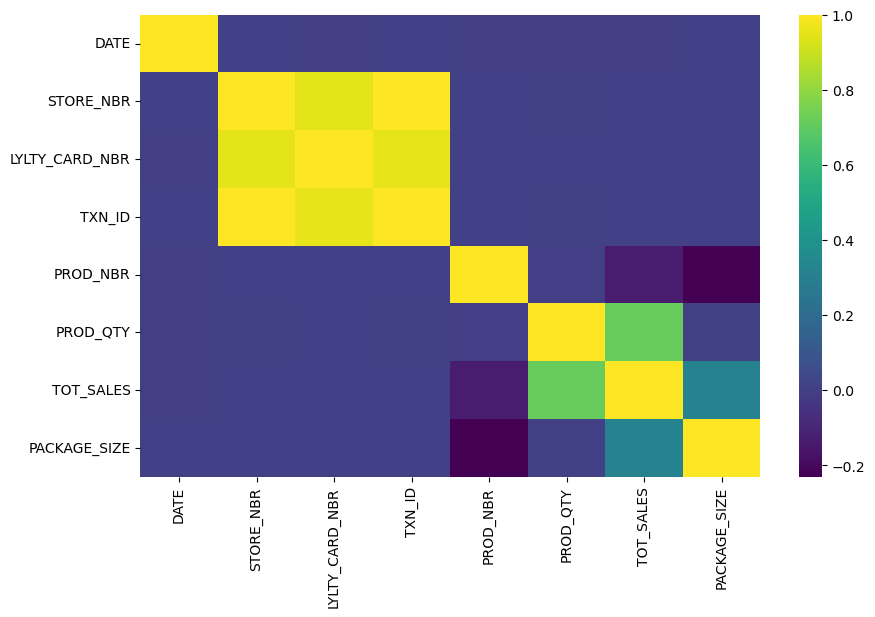

In [48]:
#correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(dummy.corr(),cmap='viridis')

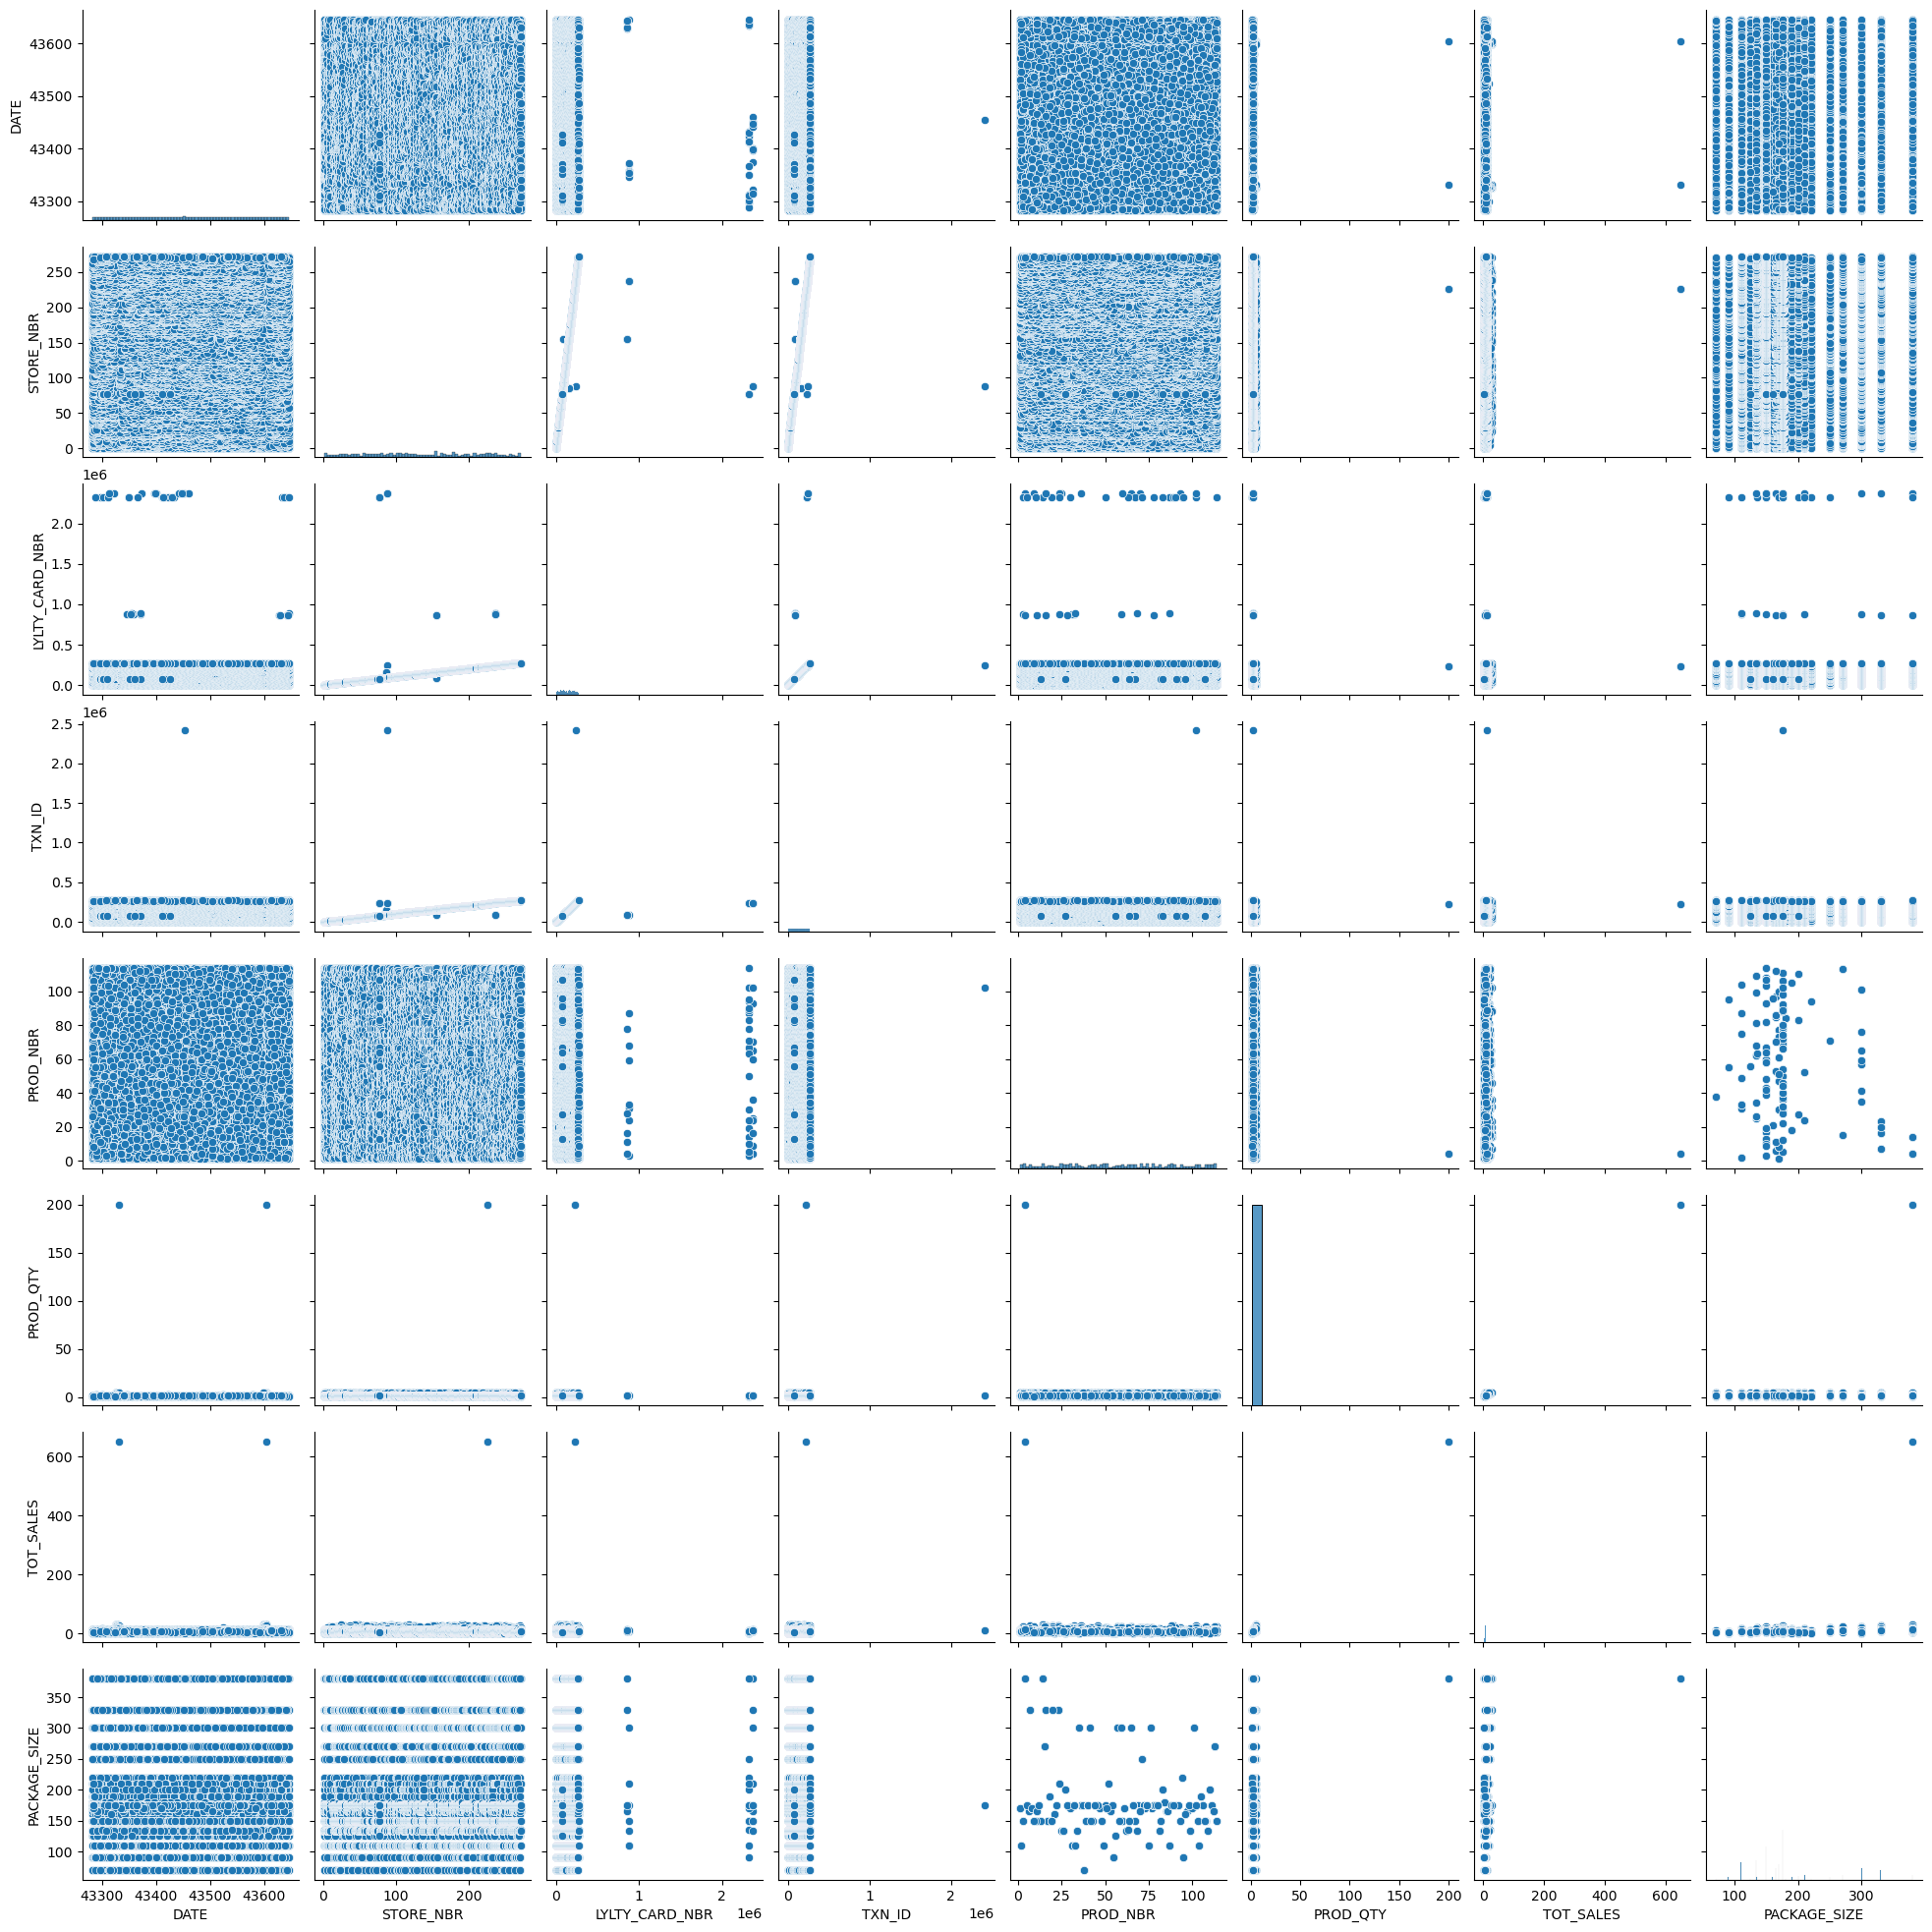

In [49]:
#pairplot
sns.pairplot(data=dummy[dummy.columns.drop('PROD_NAME')])

# Purchase

In [50]:
#reading data
purchase=pd.read_csv("QVI_purchase_behaviour.csv");
purchase.head(2)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream


In [51]:
purchase['LYLTY_CARD_NBR'].nunique()

72637

In [52]:

purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [53]:
purchase.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [54]:

purchase.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [55]:
tr_data['PURCHASE_SIZE']= dummy['PACKAGE_SIZE']

In [56]:
tr_data['BRAND']= dummy['BRAND']

In [57]:
tr_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_NAME,PURCHASE_SIZE,BRAND
0,2018-10-17,1,1000.0,1.0,5,2.0,6.0,Natural Chip Compny SeaSalt,175,NCC
1,2019-05-14,1,1307.0,348.0,66,3.0,6.3,CCs Nacho Cheese,175,CCs
2,2019-05-20,1,1343.0,383.0,61,2.0,2.9,Smiths Crinkle Cut Chips Chicken,170,Smiths
3,2018-08-17,2,2373.0,974.0,69,NaN,15.0,Smiths Chip Thinly SCreamOnion,175,Smiths
4,2018-08-18,2,2426.0,1038.0,108,3.0,13.8,Kettle Tortilla ChpsHnyJlpno Chili,150,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319.0,270088.0,89,2.0,10.8,Kettle Sweet Chilli And Sour Cream,175,Kettle
264832,2018-08-13,272,272358.0,270154.0,74,1.0,4.4,Tostitos Splash Of Lime,175,Tostitos
264833,2018-11-06,272,272379.0,270187.0,51,2.0,8.8,Doritos Mexicana,170,Doritos
264834,2018-12-27,272,272379.0,270188.0,42,2.0,7.8,Doritos Corn Chip Mexican Jalapeno,150,Doritos


In [58]:
finaldf=pd.merge(tr_data,purchase,on='LYLTY_CARD_NBR')
finaldf.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_NAME,PURCHASE_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000.0,1.0,5,2.0,6.0,Natural Chip Compny SeaSalt,175,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307.0,348.0,66,3.0,6.3,CCs Nacho Cheese,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307.0,346.0,96,2.0,3.8,WW Original Stacked Chips,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307.0,347.0,54,1.0,2.1,CCs Original,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343.0,383.0,61,2.0,2.9,Smiths Crinkle Cut Chips Chicken,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [59]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246700 entries, 0 to 246699
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246700 non-null  datetime64[ns]
 1   STORE_NBR         246700 non-null  int64         
 2   LYLTY_CARD_NBR    246700 non-null  float64       
 3   TXN_ID            246699 non-null  float64       
 4   PROD_NBR          246700 non-null  int64         
 5   PROD_QTY          245912 non-null  float64       
 6   TOT_SALES         246289 non-null  float64       
 7   PROD_NAME         246700 non-null  object        
 8   PURCHASE_SIZE     246700 non-null  int64         
 9   BRAND             246700 non-null  object        
 10  LIFESTAGE         246700 non-null  object        
 11  PREMIUM_CUSTOMER  246700 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 24.5+ MB


In [60]:
finaldf.isna().sum()

DATE                  0
STORE_NBR             0
LYLTY_CARD_NBR        0
TXN_ID                1
PROD_NBR              0
PROD_QTY            788
TOT_SALES           411
PROD_NAME             0
PURCHASE_SIZE         0
BRAND                 0
LIFESTAGE             0
PREMIUM_CUSTOMER      0
dtype: int64

In [61]:
## Removing null values
finaldf['TXN_ID'].fillna(int(finaldf['TXN_ID'].mean()), inplace=True)
finaldf['PROD_QTY'].fillna(int(finaldf['PROD_QTY'].mean()), inplace=True)
finaldf['TOT_SALES'].fillna(int(finaldf['TOT_SALES'].mean()), inplace=True)

In [62]:
finaldf.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_QTY            0
TOT_SALES           0
PROD_NAME           0
PURCHASE_SIZE       0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [63]:
finaldf.to_csv('Final.csv')

In [64]:
finaldf[['TOT_SALES','PREMIUM_CUSTOMER']].groupby('PREMIUM_CUSTOMER').sum().sort_values('TOT_SALES',ascending=False)

,TOT_SALES
PREMIUM_CUSTOMER,
Mainstream,698605.40
Budget,629212.55
Premium,471390.95


In [65]:
#Who spends the most on chips (total sales), describing customers by lifestage and
#how premium their general purchasing behaviour is
a=finaldf[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES']].groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).sum()
a.sort_values('TOT_SALES',ascending=False)

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           OLDER FAMILIES          156227.95
Mainstream       YOUNG SINGLES/COUPLES   147166.90
                 RETIREES                144839.65
Budget           YOUNG FAMILIES          129301.25
                 OLDER SINGLES/COUPLES   127327.70
Mainstream       OLDER SINGLES/COUPLES   124167.30
Premium          OLDER SINGLES/COUPLES   123085.15
Budget           RETIREES                105510.50
Mainstream       OLDER FAMILIES           96036.15
Premium          RETIREES                 91013.05
Mainstream       YOUNG FAMILIES           86047.95
                 MIDAGE SINGLES/COUPLES   84395.75
Premium          YOUNG FAMILIES           78286.90
                 OLDER FAMILIES           74977.70
Budget           YOUNG SINGLES/COUPLES    57024.70
Premium          MIDAGE SINGLES/COUPLES   54279.15
                 YOUNG SINGLES/COUPLES    39014.80
Budget           MIDAGE SINGLES/COUPLES   33249.00
                 NEW FAMILIES             20571.45
Mainstream       NEW FAMILIES             15951.70
Premium          NEW FAMILIES             10734.20

<Axes: xlabel='LIFESTAGE', ylabel='TOT_SALES'>

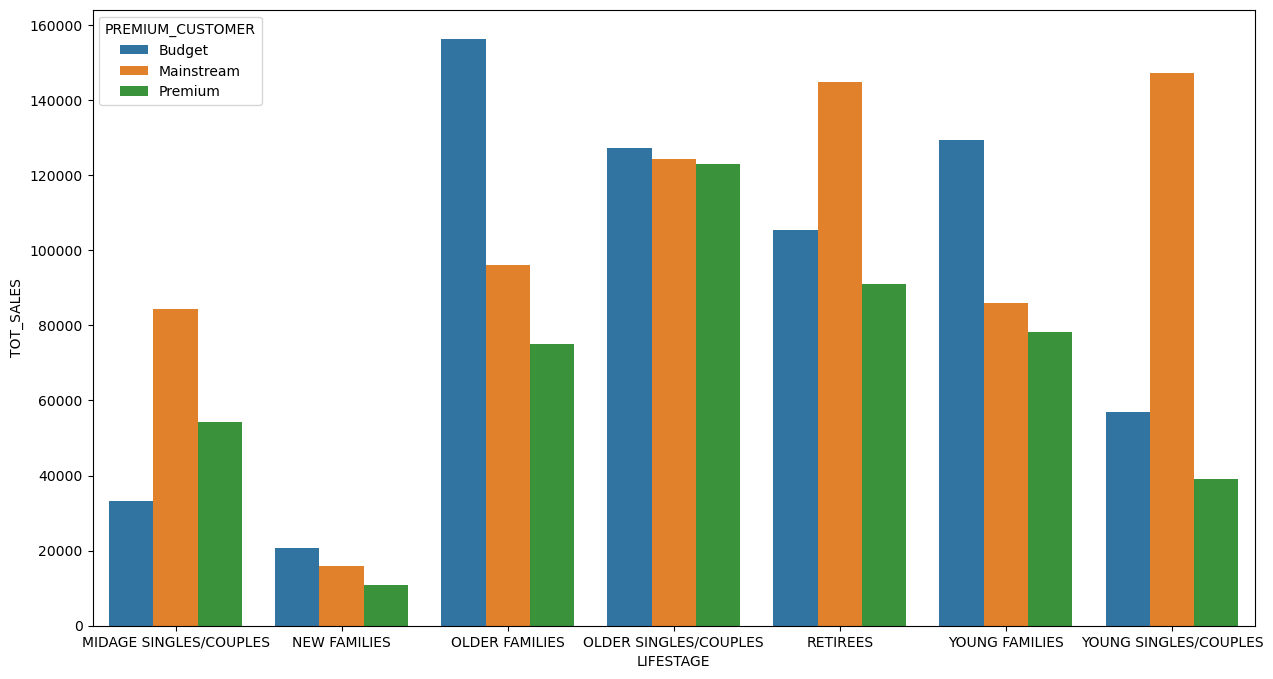

In [66]:
plt.figure(figsize=(15,8))
sns.barplot(y=a.reset_index()['TOT_SALES'],x=a.reset_index()['LIFESTAGE'],hue=a.reset_index()['PREMIUM_CUSTOMER'])

In [67]:
# How many customers are in each segment
b=purchase.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).count()
b.columns=['CUSTOMER_COUNT']
b.sort_values('CUSTOMER_COUNT',ascending=False)

CUSTOMER_COUNT
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES             8088
                 RETIREES                          6479
                 OLDER SINGLES/COUPLES             4930
Budget           OLDER SINGLES/COUPLES             4929
Premium          OLDER SINGLES/COUPLES             4750
Budget           OLDER FAMILIES                    4675
                 RETIREES                          4454
                 YOUNG FAMILIES                    4017
Premium          RETIREES                          3872
Budget           YOUNG SINGLES/COUPLES             3779
Mainstream       MIDAGE SINGLES/COUPLES            3340
                 OLDER FAMILIES                    2831
                 YOUNG FAMILIES                    2728
Premium          YOUNG SINGLES/COUPLES             2574
                 YOUNG FAMILIES                    2433
                 MIDAGE SINGLES/COUPLES            2431
                 OLDER FAMILIES                    2274
Budget           MIDAGE SINGLES/COUPLES            1504
                 NEW FAMILIES                      1112
Mainstream       NEW FAMILIES                       849
Premium          NEW FAMILIES                       588

In [68]:
#How many chips are bought per customer by segment
c=finaldf[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES']].groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).count()
c.sort_values('TOT_SALES',ascending=False).head(5)

,,TOT_SALES
LIFESTAGE,PREMIUM_CUSTOMER,
OLDER FAMILIES,Budget,21508
RETIREES,Mainstream,19968
YOUNG SINGLES/COUPLES,Mainstream,19540
YOUNG FAMILIES,Budget,17760
OLDER SINGLES/COUPLES,Budget,17167


In [69]:
#  The customer's total spend over the period        
# to understand what proportion of their grocery spend is on chips 
transaction1=pd.read_excel("QVI_transaction_data.xlsx")
totsalespercust=transaction1[['LYLTY_CARD_NBR','TOT_SALES']].groupby(['LYLTY_CARD_NBR']).sum().reset_index()
ratio=finaldf[['LYLTY_CARD_NBR','TOT_SALES']].merge(totsalespercust,on='LYLTY_CARD_NBR').rename(columns={'TOT_SALES_x':'TRAN_SALE','TOT_SALES_y':'CUST_TOT_SALE'})
ratio['RATIO']=ratio['TRAN_SALE']/ratio['CUST_TOT_SALE']
ratio.sort_values('RATIO')

,LYLTY_CARD_NBR,TRAN_SALE,CUST_TOT_SALE,RATIO
66413,226000.0,7.0,1300.0,0.005385
66412,226000.0,7.0,1300.0,0.005385
174179,152094.0,1.9,112.1,0.016949
75452,48155.0,1.9,100.7,0.018868
174528,168140.0,1.7,86.5,0.019653
...,...,...,...,...
163927,49312.0,11.4,11.4,1.000000
163826,47486.0,7.4,7.4,1.000000
163823,47465.0,10.8,10.8,1.000000
163974,51077.0,5.4,5.4,1.000000


In [70]:
#  Proportion of customers in each customer segment overall to compare against the
# mix of customers who purchase chips
e=finaldf[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES']].groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).count()
e["TOT_SALES"]/(e['TOT_SALES'].sum())

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES    0.019011
                  NEW FAMILIES              0.011447
                  OLDER FAMILIES            0.087183
                  OLDER SINGLES/COUPLES     0.069587
                  RETIREES                  0.057645
                  YOUNG FAMILIES            0.071990
                  YOUNG SINGLES/COUPLES     0.034747
Mainstream        MIDAGE SINGLES/COUPLES    0.044970
                  NEW FAMILIES              0.008857
                  OLDER FAMILIES            0.053672
                  OLDER SINGLES/COUPLES     0.069128
                  RETIREES                  0.080940
                  YOUNG FAMILIES            0.048419
                  YOUNG SINGLES/COUPLES     0.079206
Premium           MIDAGE SINGLES/COUPLES    0.030847
                  NEW FAMILIES              0.006032
                  OLDER FAMILIES            0.042177
                  OLDER SINGLES/COUPLES     0.067118
     

In [71]:
# What's the average chip price by customer segment
finaldf['CHIP_PRICE']=finaldf['TOT_SALES']/finaldf['PROD_QTY']
d=finaldf[['LIFESTAGE','PREMIUM_CUSTOMER','CHIP_PRICE']].groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).mean()
d.sort_values("CHIP_PRICE",ascending=False)

CHIP_PRICE
PREMIUM_CUSTOMER LIFESTAGE                         
Mainstream       YOUNG SINGLES/COUPLES     4.076380
                 MIDAGE SINGLES/COUPLES    4.008131
Premium          RETIREES                  3.938116
Budget           RETIREES                  3.937835
                 NEW FAMILIES              3.925620
Mainstream       NEW FAMILIES              3.924645
Premium          OLDER SINGLES/COUPLES     3.911347
Budget           OLDER SINGLES/COUPLES     3.897757
Premium          NEW FAMILIES              3.875470
Mainstream       RETIREES                  3.861566
                 OLDER SINGLES/COUPLES     3.832546
Premium          MIDAGE SINGLES/COUPLES    3.789809
                 YOUNG FAMILIES            3.784907
Budget           YOUNG FAMILIES            3.784001
                 MIDAGE SINGLES/COUPLES    3.768028
                 OLDER FAMILIES            3.766784
Mainstream       OLDER FAMILIES            3.763691
                 YOUNG FAMILIES            3.759888
Premium          OLDER FAMILIES            3.748100
                 YOUNG SINGLES/COUPLES     3.686347
Budget           YOUNG SINGLES/COUPLES     3.677368

# T Test

In [73]:
from scipy import stats
#Mainstream vs premium
stats.ttest_ind([4.065642,3.994241],[3.770698,3.665414])

Ttest_indResult(statistic=4.903408005498769, pvalue=0.039164352682153285)

In [74]:
midage=finaldf[(finaldf['PREMIUM_CUSTOMER']=='Mainstream') & (finaldf['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')]
young=finaldf[(finaldf['PREMIUM_CUSTOMER']=='Mainstream') & (finaldf['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]
print(f"MIDAGE SINGLES/COUPLES\n{midage['BRAND'].value_counts().head(5)}")
print(f"YOUNG SINGLES/COUPLES\n{young['BRAND'].value_counts().head(5)}")

MIDAGE SINGLES/COUPLES
Kettle       2136
Smiths       1276
Doritos      1209
Pringles     1159
Infuzions     679
Name: BRAND, dtype: int64
YOUNG SINGLES/COUPLES
Kettle       3843
Doritos      2379
Pringles     2315
Smiths       1920
Infuzions    1250
Name: BRAND, dtype: int64


In [75]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [76]:
young

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_NAME,PURCHASE_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,CHIP_PRICE
221309,2018-08-16,1,1020.0,26.0,19,1.0,2.6,Smiths Crinkle Cut SnagSauce,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
221310,2018-10-02,1,1020.0,27.0,7,1.0,5.7,Smiths Crinkle Original,330,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.7
221311,2019-05-02,1,1020.0,28.0,84,1.0,3.1,GrnWves Plus Btroot Chilli Jam,180,GrnWves,YOUNG SINGLES/COUPLES,Mainstream,3.1
221312,2018-08-17,1,1163.0,188.0,46,1.0,5.4,Kettle Original,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
221313,2019-02-07,1,1163.0,189.0,12,1.0,3.0,Natural Chip Co Tmato HrbSpce,175,NCC,YOUNG SINGLES/COUPLES,Mainstream,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240844,2018-12-01,272,272377.0,270186.0,75,2.0,7.6,Cobs Popd Sea Salt Chips,110,Cobs,YOUNG SINGLES/COUPLES,Mainstream,3.8
240845,2018-07-27,272,272389.0,270200.0,114,2.0,9.2,Kettle Sensations Siracha Lime,150,Kettle,YOUNG SINGLES/COUPLES,Mainstream,4.6
240846,2018-11-10,272,272389.0,270201.0,26,2.0,7.4,Pringles SweetSpcy BBQ,134,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7
240847,2019-04-01,272,272389.0,270202.0,62,2.0,7.4,Pringles Mystery Flavour,134,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7


In [77]:
print(f"MIDAGE SINGLES/COUPLES\n{midage['PURCHASE_SIZE'].value_counts().head(5)}")
print(f"YOUNG SINGLES/COUPLES\n{young['PURCHASE_SIZE'].value_counts().head(5)}")


MIDAGE SINGLES/COUPLES
175    2975
150    1777
134    1159
110    1124
170     882
Name: PURCHASE_SIZE, dtype: int64
YOUNG SINGLES/COUPLES
175    4996
150    3080
134    2315
110    2051
170    1575
Name: PURCHASE_SIZE, dtype: int64


# Assosiation

In [78]:
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth

In [79]:
basket=finaldf.groupby(['LYLTY_CARD_NBR','BRAND'])['PROD_QTY'].sum().unstack().fillna(0)
basket


BRAND,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain,GrnWves,Infuzions,...,NCC,Pringles,RRD,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,,
1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1005.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272388.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
272389.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
272390.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [80]:
def reducer(x):
    if x <= 0:
        return 0
    else:
        return 1
basket=basket.applymap(reducer)
basket

BRAND,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain,GrnWves,Infuzions,...,NCC,Pringles,RRD,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,,
1000.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1002.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1003.0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1004.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1005.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272388.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
272389.0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
272390.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [81]:
frequent=apriori(basket,0.1,use_colnames=True)
frequent

C:\Users\Mubashir\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.125788,(Cobs)
1,0.290534,(Doritos)
2,0.177349,(Infuzions)
3,0.423353,(Kettle)
4,0.289874,(Pringles)
5,0.180142,(RRD)
6,0.314981,(Smiths)
7,0.176661,(Thins)
8,0.122911,(Tostitos)
9,0.122490,(Twisties)


In [82]:
association_rules(frequent,metric='lift',min_threshold=1).sort_values(['support','confidence'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Doritos),(Kettle),0.290534,0.423353,0.136468,0.469713,1.109508,0.013469,1.087425,0.139118
1,(Kettle),(Doritos),0.423353,0.290534,0.136468,0.322350,1.109508,0.013469,1.046950,0.171161
2,(Pringles),(Kettle),0.289874,0.423353,0.135513,0.467490,1.104256,0.012794,1.082885,0.132952
3,(Kettle),(Pringles),0.423353,0.289874,0.135513,0.320095,1.104256,0.012794,1.044449,0.163727
4,(Smiths),(Kettle),0.314981,0.423353,0.135176,0.429157,1.013710,0.001828,1.010168,0.019744
5,(Kettle),(Smiths),0.423353,0.314981,0.135176,0.319300,1.013710,0.001828,1.006344,0.023454


#Therefore if someone buys Doritos Kettle can be recommended and vice-versa. Same for Pringles and Kettle

# Thankssssss